<a href="https://colab.research.google.com/github/Ganesh7134/Automated_News_Classification_System_Using_NLP/blob/main/News_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/Science.csv")
df2 = pd.read_csv("/content/drive/MyDrive/sports.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Business.csv")
df = pd.concat([df1,df2,df3],axis=0)
df.head()

,article_name,description,category
0,Why the multiverse is possible according to ph...,If a theory about the physical world is experi...,Science
1,Webb telescope captures 'stunning' images of 1...,A batch of newly released images captured by t...,Science
2,NASA’s historic Mars helicopter Ingenuity grou...,NASA said on Thursday its Mars robot helicopte...,Science
3,How many trees do we have?,A detailed analysis of the earth’s trees was m...,Science
4,India-made typhoid vaccine efficacy lasts for ...,A phase-3 trial in children aged between nine ...,Science


In [4]:
df.isna().sum()

article_name      0
description     120
category          0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
len(df)

1798

In [7]:
df["description"].apply(lambda x :len(x))

0      295
1      242
2      268
3      560
4      458
      ... 
598    203
599    203
600    115
601    179
602    173
Name: description, Length: 1798, dtype: int64

In [8]:
df["category"].value_counts()

Science     693
Sports      576
Business    529
Name: category, dtype: int64

In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

In [10]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
sw = stopwords.words("english")
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
import nltk
def preprocessing(text):
    pattern = r"https?://[^\s]+|[^a-zA-Z]"  # Match URLs and non-alphabetic characters
    clean_text = re.sub(pattern, " ", text)
    lower_text = clean_text.lower()
    word_tokenize = nltk.word_tokenize(lower_text)
    stop_words = set(sw)  # Get English stop words
    filtered_tokens = [word for word in word_tokenize if word not in stop_words]  # Filter stop words
    preprocessed_sent = " ".join(filtered_tokens)

    return preprocessed_sent

In [14]:
df["preprocessed_text"] = df["description"].apply(preprocessing)

In [15]:
df.head()

,article_name,description,category,preprocessed_text
0,Why the multiverse is possible according to ph...,If a theory about the physical world is experi...,Science,theory physical world experimentally testable ...
1,Webb telescope captures 'stunning' images of 1...,A batch of newly released images captured by t...,Science,batch newly released images captured james web...
2,NASA’s historic Mars helicopter Ingenuity grou...,NASA said on Thursday its Mars robot helicopte...,Science,nasa said thursday mars robot helicopter ingen...
3,How many trees do we have?,A detailed analysis of the earth’s trees was m...,Science,detailed analysis earth trees made years ago m...
4,India-made typhoid vaccine efficacy lasts for ...,A phase-3 trial in children aged between nine ...,Science,phase trial children aged nine months years ca...


In [16]:
df.drop(df.loc[df["preprocessed_text"].apply(lambda x: len(x)) == 1].index,axis=0,inplace=True)

In [17]:
len(df)

1798

In [18]:
df.drop(df.loc[df["preprocessed_text"] == "questions"].index,axis=0,inplace=True)

In [19]:
len(df)

1742

In [20]:
df["category"].value_counts()

Science     674
Sports      558
Business    510
Name: category, dtype: int64

In [21]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
from nltk import pos_tag

# Preprocessing functions
def tokenize(text):
  return word_tokenize(text.lower())

def tag_pos(tokens):
  return pos_tag(tokens)

# Conditional lemmatization based on POS
def conditioned_lemmatize(tagged_tokens):
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = []
  for token, pos in tagged_tokens:
    if pos.startswith("N"):
      lemmatized_tokens.append(lemmatizer.lemmatize(token, "n"))
    elif pos.startswith("V"):
      lemmatized_tokens.append(lemmatizer.lemmatize(token, "v"))
    else:
      lemmatized_tokens.append(token)
  return lemmatized_tokens

# Example usage
text = "The students are studying hard for the exams."

tokens = tokenize(text)
tagged_tokens = tag_pos(tokens)
lemmatized_tokens = conditioned_lemmatize(tagged_tokens)

lemmatized_text = " ".join(lemmatized_tokens)

print(f"Original text: {text}")

print(f"Lemmatized text: {lemmatized_text}")

Original text: The students are studying hard for the exams.
Lemmatized text: the student be study hard for the exam .


In [23]:
tokens

['the', 'students', 'are', 'studying', 'hard', 'for', 'the', 'exams', '.']

In [24]:
tagged_tokens

[('the', 'DT'),
 ('students', 'NNS'),
 ('are', 'VBP'),
 ('studying', 'VBG'),
 ('hard', 'RB'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('exams', 'NNS'),
 ('.', '.')]

In [25]:
lemmatized_tokens

['the', 'student', 'be', 'study', 'hard', 'for', 'the', 'exam', '.']

In [26]:
nltk.download("tagsets")

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [27]:
import nltk
nltk.help.upenn_tagset() # to check pos_tag description

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [28]:
Lemmatize_text = []
for i in df["preprocessed_text"]:
    tokens = tokenize(i)
    tagged_tokens = tag_pos(tokens)
    lemmatized_tokens = conditioned_lemmatize(tagged_tokens)
    lemmatized_text = " ".join(lemmatized_tokens)
    Lemmatize_text.append(lemmatized_text)

In [29]:
df["filtered_text"] = Lemmatize_text

In [30]:
from nltk.tokenize import word_tokenize
tokens = []
for i in df["filtered_text"]:
    tokens.append(word_tokenize(i))

## **Frequency distribution of words occurance**

In [31]:
from nltk import FreqDist

combined_fdist = FreqDist()  # Create a new, empty FreqDist

for i in tokens:
    # Create a FreqDist for each token and add its counts to the combined one
    fdist = FreqDist(i)
    combined_fdist += fdist

# Print the most common words and their frequencies
print(combined_fdist.most_common(10))

[('india', 472), ('year', 360), ('say', 281), ('first', 233), ('indian', 226), ('test', 207), ('cricket', 204), ('space', 199), ('day', 182), ('world', 179)]


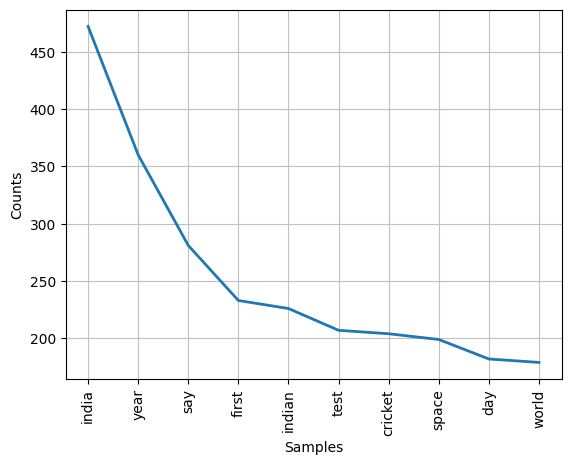

<Figure size 2000x2000 with 0 Axes>

In [32]:
from matplotlib import pyplot as plt
FreqDist.plot(FreqDist(combined_fdist), 10)
plt.figure(figsize=(20,20))
plt.show()

In [33]:
df.drop(df.loc[df["filtered_text"] == ""].index,axis=0,inplace=True)

In [34]:
len(df)

1730

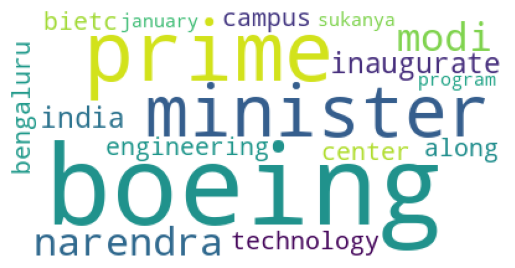

In [35]:
# Display WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

for i in df["filtered_text"]:
  # Create WordCloud
  wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(i)


plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [36]:
len(df)

1730

In [37]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 1.5 MB/s eta 0:00:00


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# vectorizer = TfidfVectorizer()
# text_features = vectorizer.fit_transform(df['article_name'])

# # Use 'text_features' for clustering with K-means
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(text_features)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
df["article_name"].values

array(['Why the multiverse is possible according to physics, but not definitely',
       "Webb telescope captures 'stunning' images of 19 spiral galaxies",
       'NASA’s historic Mars helicopter Ingenuity grounded for good after 72 flights',
       ...,
       'Hangzhou Asian Games cricket | Indian men clinch gold without having to bat',
       'Logan van Beek charts a ‘different way’ to the World Cup',
       'Hangzhou Asian Games cricket | Washington and Sai Kishore help India trump Bangladesh, to face Afghanistan in the final'],
      dtype=object)

In [39]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
model = SentenceTransformer('all-MiniLM-L6-v2')

corpus = df["article_name"].values

corpus_embeddings = model.encode(corpus)

cluster = KMeans(n_clusters=3)

cluster.fit(corpus_embeddings)

cluster_assignment = cluster.labels_

cluster_sentence = [[] for i in range(3)]

for sentence_id , cluster_id in enumerate(cluster_assignment):
  cluster_sentence[cluster_id].append(corpus[sentence_id])

for i , cluster in enumerate(cluster_sentence):
  print("Cluster ",i+1)
  print(cluster)
  print("")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster  1
['Fixing food could produce trillions in annual benefits: report', 'Urbanisation in Bhubaneswar impacts winter surface temperatures', 'India will ‘commission a nuclear power reactor every year’: NPCIL chief', 'Why are tubeless tyres not popular in India?', 'With pooled procurement, drugs cost 82% less', 'Could sisal leaves make sanitary napkins more sustainable in India?', '2024 to be a year of Gaganyaan readiness: ISRO Chairman', 'Missing TB cases in the private sector', 'Levy 20-30% health tax on food high in sugar, salt, fat: study', 'Bezos hopes Amazon strategy will help Blue Origin top SpaceX', 'India’s extreme rain was restricted to a ‘corridor’ during 1901-2019 | Explained', 'IIT-Madras researchers find home use products cause microplastic pollution', 'Building Blocks', 'COP28: will there be an agreement to phase out fossil fuels?', 'Could COP28 help UAE become a post-oil economy? | Explained', 'Indian drug manufacturers benefit from Big Pharma interest beyond China',

In [40]:
print(cluster_sentence)

[['Fixing food could produce trillions in annual benefits: report', 'Urbanisation in Bhubaneswar impacts winter surface temperatures', 'India will ‘commission a nuclear power reactor every year’: NPCIL chief', 'Why are tubeless tyres not popular in India?', 'With pooled procurement, drugs cost 82% less', 'Could sisal leaves make sanitary napkins more sustainable in India?', '2024 to be a year of Gaganyaan readiness: ISRO Chairman', 'Missing TB cases in the private sector', 'Levy 20-30% health tax on food high in sugar, salt, fat: study', 'Bezos hopes Amazon strategy will help Blue Origin top SpaceX', 'India’s extreme rain was restricted to a ‘corridor’ during 1901-2019 | Explained', 'IIT-Madras researchers find home use products cause microplastic pollution', 'Building Blocks', 'COP28: will there be an agreement to phase out fossil fuels?', 'Could COP28 help UAE become a post-oil economy? | Explained', 'Indian drug manufacturers benefit from Big Pharma interest beyond China', 'Eight mo

In [41]:
cluster_assignment

array([1, 1, 1, ..., 1, 0, 0], dtype=int32)

In [42]:
x = df.loc[:,"description"]
y = cluster_assignment

In [43]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [44]:
print(x_train)

342    The rooftop solar programme of the Central gov...
253     Karnataka left-arm spinner Rohit Kumar termed...
446                                               Mumbai
388    After producing a match-winning performance fo...
601    The fingerprints of climate change are all ove...
                             ...                        
490    A property in the realm of materials science t...
119    India should seek deferment on imposition of c...
157    With more than a full year past since China ea...
126    Every month, the medical genetics clinic in th...
326    Advanced scientific research and education in ...
Name: description, Length: 1384, dtype: object


In [45]:
print(x_test)

385    When the think-tanks huddle up for the auction...
431     Vrinda Dinesh, like most female cricketers or...
195    From a small launch pad, the 715-kg Nike Apach...
252    The electric battery has increased the penetra...
131    It seems there is no immediate solution to Ker...
                             ...                        
558    The Indian Space Research Organisation (ISRO) ...
291    The German philosopher Walter Benjamin wrote t...
608    Following India's seven-wicket win against Pak...
344    Scientists in Britain have found they can part...
237    Indian wicketkeeper-batter Dinesh Karthik will...
Name: description, Length: 346, dtype: object


In [46]:
len(x_train) , len(x_test)

(1384, 346)

In [47]:
# converting textual data into numerical data because model will understand only numerical values
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [48]:
print(x_train)

  (0, 155)	0.13781485202148538
  (0, 1481)	0.141584944807521
  (0, 4483)	0.1525478674416338
  (0, 6450)	0.18742032649689208
  (0, 7571)	0.20569909048222443
  (0, 922)	0.09016269507787911
  (0, 8469)	0.14871032357810743
  (0, 5845)	0.057257359338436856
  (0, 773)	0.1553558004650953
  (0, 7693)	0.15392429813722258
  (0, 5699)	0.15392429813722258
  (0, 5388)	0.13606900401745647
  (0, 3436)	0.14310784638307764
  (0, 8805)	0.1584029840982987
  (0, 5462)	0.17803220216391327
  (0, 3162)	0.19323570657422265
  (0, 2938)	0.2305018277199278
  (0, 3609)	0.21222306373459546
  (0, 8810)	0.23702580097229883
  (0, 217)	0.22498588692986327
  (0, 3762)	0.17803220216391327
  (0, 8515)	0.05419096347067084
  (0, 4141)	0.24501049891922452
  (0, 2280)	0.13166557105154697
  (0, 5848)	0.1280843060705308
  :	:
  (1383, 2896)	0.13623958354977808
  (1383, 6499)	0.12114313805697999
  (1383, 7387)	0.11527583959831386
  (1383, 2789)	0.1384647374133519
  (1383, 7385)	0.10334987730688788
  (1383, 8419)	0.0923769634622

In [49]:
print(x_test)

  (0, 9190)	0.17676986518180016
  (0, 9164)	0.21434810903976276
  (0, 9162)	0.2628688650399873
  (0, 8844)	0.19602460738265867
  (0, 8424)	0.3533052499059489
  (0, 8396)	0.12499222821682766
  (0, 5012)	0.3332632263815346
  (0, 4154)	0.4236996112474962
  (0, 3604)	0.3533052499059489
  (0, 3543)	0.23383696830522496
  (0, 2840)	0.3034465429524524
  (0, 1007)	0.3034465429524524
  (0, 984)	0.14347224273584988
  (1, 9288)	0.09711516405233331
  (1, 9232)	0.14711005464496602
  (1, 9104)	0.09091693266607154
  (1, 8515)	0.04610467457334328
  (1, 8456)	0.22955213659060242
  (1, 8433)	0.09711516405233331
  (1, 8396)	0.1354366739205382
  (1, 7685)	0.18376300315905086
  (1, 7571)	0.1750050011908056
  (1, 7442)	0.18055547758874882
  (1, 6432)	0.14611182305418693
  (1, 6285)	0.15796842977559838
  :	:
  (344, 1308)	0.23315859369624367
  (345, 9242)	0.22156587558194799
  (345, 9217)	0.0996096116460811
  (345, 9190)	0.25229462630487864
  (345, 9182)	0.2378248155436852
  (345, 9164)	0.1529640700176089
  (

In [50]:
from sklearn.linear_model import LogisticRegression

# Train a Multinomial Naive Bayes classifier
classifier = LogisticRegression(max_iter=1000)  # Initial values

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.91
Confusion Matrix:
[[ 89  15   1]
 [  5 128   2]
 [  0   7  99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.89       105
           1       0.85      0.95      0.90       135
           2       0.97      0.93      0.95       106

    accuracy                           0.91       346
   macro avg       0.92      0.91      0.91       346
weighted avg       0.92      0.91      0.91       346



In [57]:
# x_new = ["NASA tried to launch chandrayan to space"]

# x_new1 = ["virat take century"]

x_new2 = ["Ambani invested money to build jio petrol pumps"]

new_features = vectorizer.transform(x_new2)

# Get the predicted topic label
proba = classifier.predict_proba(new_features)

categories = ["Business", "Science","Sports"]
# Print the predicted category and its probability
predicted_category = categories[np.argmax(proba)]
print(f"Predicted category: {predicted_category}")
print(f"Probabilities: {proba[0]}")

Predicted category: Business
Probabilities: [0.43677634 0.38660499 0.17661867]


In [61]:
import pickle

with open("news_model.pkl","wb") as f:
  pickle.dump(classifier,f)
with open("vectorizer_1.pkl","wb") as f:
  pickle.dump(vectorizer,f)